# Technoecom: Digital Transformation - Project 1

### Business Context:
In the contemporary era, electronic devices have become an integral part of everyday life, ranging from basic LED lights to cutting-edge laptops and 4K televisions. With such widespread demand for these products, many entrepreneurs have ventured into the electronic goods and services sector. Technoecom stands out as one of Australia's premier direct-to-consumer retailers in this domain. Offering an extensive array of over 500 top-notch electronic products sourced from global manufacturers, the company caters to diverse consumer needs across various categories.

Their product range spans gaming devices, accessories, wireless speakers, smartphones, laptop peripherals, entertainment systems, and high-end home appliances from luxury brands. Operating in more than 10 cities, Technoecom ensures nationwide accessibility by delivering products directly to customers' doorsteps.

In a strategic move towards digital transformation, the company has recently launched its e-commerce platform. This initiative aims to pilot sales and delivery operations through the online platform for a duration of three months, reflecting their commitment to staying at the forefront of technological advancements in retail.

### Problem Statement:
Transitioning to conducting business via an e-commerce platform has proven to be a challenging endeavor. Over the course of the past three months, Technoecom has encountered numerous obstacles spanning different areas, including payment methods, order volume, geographical coverage, expedited shipping, and customer satisfaction. Now, the company is seeking to assess the feasibility of expanding this digital transformation to additional cities and to evaluate the revenue generated from this pilot program.

### Objective:
The Chief Experience Officer (CXO) is keen on enhancing monitoring and diagnostic capabilities to ensure the company makes informed decisions. As the analytics lead, your role is to conduct data preprocessing and exploratory data analysis (EDA) to gain insights into the digital transformation initiative and submit a detailed analysis report. This report will provide the necessary information for the CXO to make informed decisions regarding the potential expansion of this digital transformation to other cities.

## Importing the required libraries

In [ ]:
# write you are code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# set seaborn style
sns.set(style='whitegrid')

## Dataset Import

Run the code written below. After running the code, Google Colab will ask you to upload the.csv file. Please upload the same.

In [ ]:
# write you are code here
# reading dataset from path
df = pd.read_csv('/content/sample_data/technoecom (2).csv')

# Display first few rows
df.head()

,customer_id,marital_status,occupation,education,warehouse_name,order_id,order_date,order_price,delivery_charges,coupon_discount,order_type,order_payment,is_expedited_delivery,distance_to_nearest_warehouse,customer_satisfaction,age,warehouse_area_type,warehouse_size,total_bill
0,ID0571731474,Yes,Manager,Masters,Nickolson,ORD001041,13-06-2021,8725,66.86,15,COD,Cash,False,0.7237,False,24,Commercial,Medium,7483.11
1,ID6167441063,Yes,Clerical,School,Thompson,ORD004361,02-06-2021,22220,53.80,15,COD,Cash,False,1.4593,False,30,Industrial,Large,18940.80
2,ID6221450539,Yes,Lawyer,Masters,Nickolson,ORD004602,17-06-2021,10460,65.47,15,COD,Debit Card,True,1.0229,True,23,Commercial,Medium,8956.47
3,ID2383211221,Yes,Manager,High School,Nickolson,ORD004848,13-06-2021,15070,79.13,5,COD,Debit Card,True,1.0328,True,28,Commercial,Medium,14395.63
4,ID0248129431,No,Student,School,Nickolson,ORD005232,09-07-2021,5905,95.22,15,COD,Credit Card,True,0.1227,True,31,Commercial,Medium,5114.47


## Understand the data

#### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# write you are code here
rows, cols = df.shape
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 507
Number of columns: 19


#### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
# write you are code here
# datatypes of columns
df.dtypes


,0
customer_id,object
marital_status,object
occupation,object
education,object
warehouse_name,object
order_id,object
order_date,object
order_price,int64
delivery_charges,float64
coupon_discount,int64


## Data Preprocessing

### Missing value Identification and Treatment

#### **Question 3:** Are there any missing values in the data? If so, treat them using an appropriate method.

In [ ]:
# write you are code here
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values

,0
customer_id,0
marital_status,0
occupation,0
education,10
warehouse_name,0
order_id,0
order_date,0
order_price,0
delivery_charges,10
coupon_discount,0


In [ ]:
#There are missing values in columns
#education(10),delivery_charges(10),order_type(10)
# and order_payment(17).
#Two types of missing value treatment are required
#namely for numerical and categorical variables.
#To do that we fill categorical missing variables with mode
# and the numerical  ones with median

#missing value treatment for categorical variables
df_cat = df.select_dtypes(include = ['object'])
print("Total Categorical Columns = ",df_cat.shape[1])

Total Categorical Columns =  11


In [ ]:
df_cat['education'].fillna(df_cat['education'].mode() [0], inplace=True)
df_cat['education'].isna().sum()


np.int64(0)

In [ ]:
df_cat['order_type'].fillna(df_cat['order_type'].mode() [0], inplace=True)

df_cat['order_type'].isna().sum()

np.int64(0)

In [ ]:
df_cat['order_payment'].fillna(df_cat['order_payment'].mode() [0], inplace=True)
df_cat['order_payment'].isna().sum()

np.int64(0)

In [ ]:
#missing value treatment for numerical variables

df_num = df.select_dtypes(exclude = ['object'])
print("Total numerical Columns = ",df_num.shape[1])


Total numerical Columns =  8


In [ ]:
df_num['delivery_charges'].median()
df_num['delivery_charges'].isna().sum()
df_num['delivery_charges'].fillna(df_num['delivery_charges'].median(), inplace=True)


In [ ]:
df_num['delivery_charges'].isna().sum()

np.int64(0)

In [ ]:
#merge the two(categorical & numerical) dataframes
df= pd.concat([df_cat, df_num], axis=1)
df.shape

(507, 19)

In [ ]:
df.isnull().sum()

,0
customer_id,0
marital_status,0
occupation,0
education,0
warehouse_name,0
order_id,0
order_date,0
order_type,0
order_payment,0
warehouse_area_type,0


#### **Question 4:** Check the statistical summary of the data.

In [ ]:
# write you are code here
# Statistical summary of numerical columns
df.describe()


,order_price,delivery_charges,coupon_discount,distance_to_nearest_warehouse,age,total_bill
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,25169.739645,76.103452,12.869822,2.374596,27.297830,21843.925385
std,85785.462396,15.867656,7.557344,9.673633,2.902918,74053.432275
min,0.000000,0.000000,0.000000,0.107800,22.000000,68.240000
25%,6877.500000,66.025000,10.000000,0.751700,25.000000,6000.675000
50%,12765.000000,76.290000,15.000000,1.032800,27.000000,11059.890000
75%,20325.000000,82.370000,15.000000,1.408650,30.000000,17662.385000
max,947691.000000,114.040000,25.000000,94.973400,32.000000,853012.720000


#### Question 5: Are there duplicates in the dataset, if so please treat them

In [ ]:
# write you are code here
#Check duplicates
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Remove duplicates if any
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 7
Duplicates removed. New shape: (500, 19)


## Data Treatment

#### Let's check if there is any discrepancy in the values in the following columns: 'occupation' and 'education'.

In [ ]:
# write you are code here
# Check unique values in education and occupation to identify discrepancies
print(df['education'].unique())
print(df['occupation'].unique())

['Masters' 'School' 'High School' 'PhD' 'Bachelors' '?']
['Manager' 'Clerical' 'Lawyer' 'Student' 'Doctor' 'Blue Collar'
 'Professional' 'Home Maker' 'Blue-Collar']


* Replace '?' in education with 'Unknown'
* Replace 'Blue-Collar' with 'Blue Collar' in occupation



In [ ]:
# write you are code here
df['education'] = df['education'].replace("?", "Unknown")
df['occupation'] = df['occupation'].replace("Blue-Collar", "Blue Collar")

In [ ]:
df['education'].unique()

array(['Masters', 'School', 'High School', 'PhD', 'Bachelors', 'Unknown'],
      dtype=object)

In [ ]:
df['occupation'].unique()

array(['Manager', 'Clerical', 'Lawyer', 'Student', 'Doctor',
       'Blue Collar', 'Professional', 'Home Maker'], dtype=object)

## Exploratory Data Analysis (EDA)
#### Now, after handling the missing values and also checking the data types, let's visualise the dataset.

### Univariate Analysis

Perform univariate and bivariate analyses on different columns of the data and write the observations that you got from the charts and plots

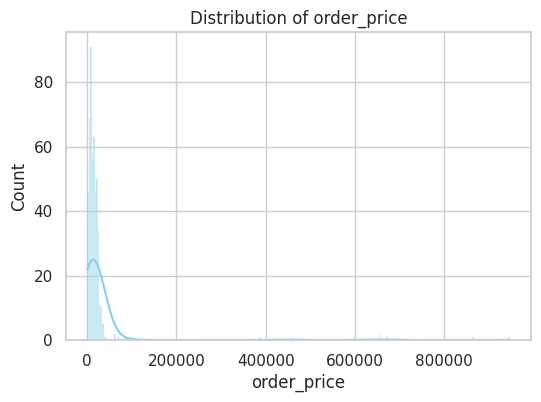

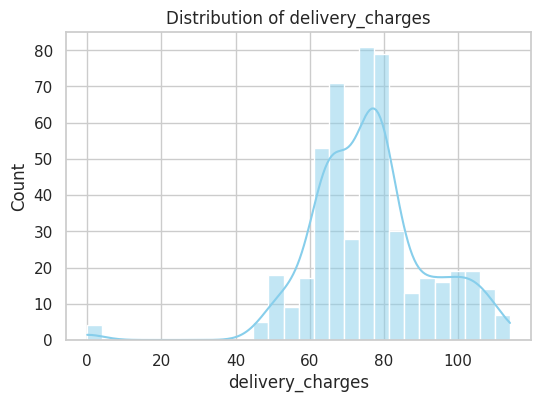

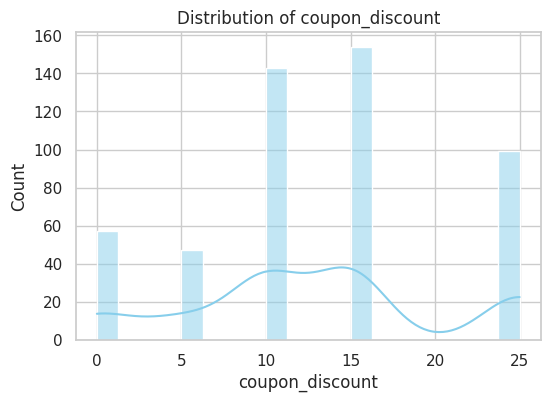

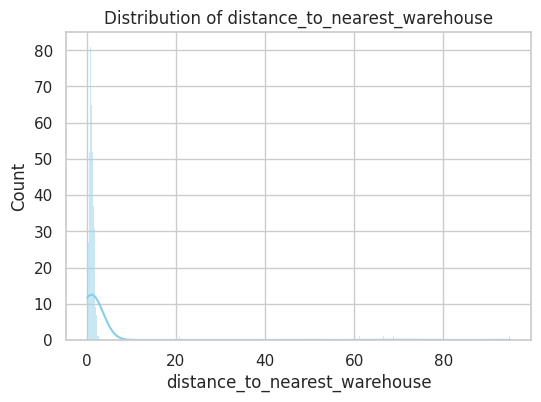

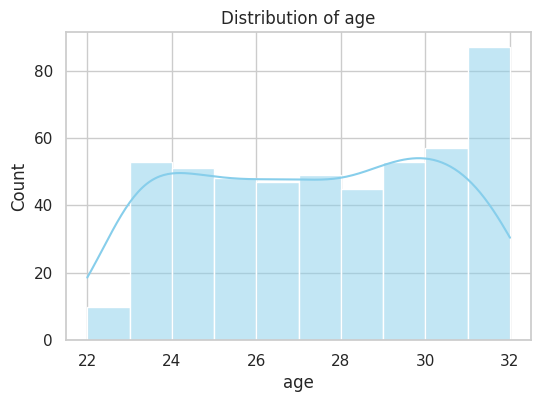

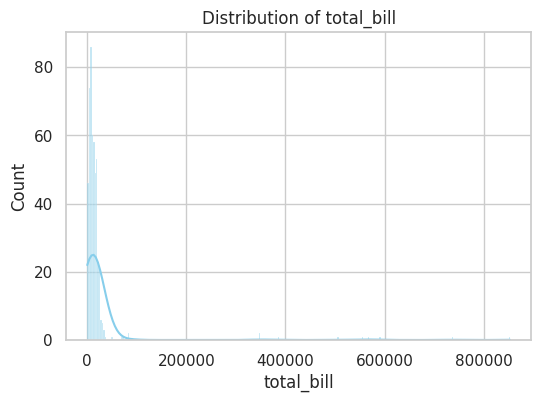

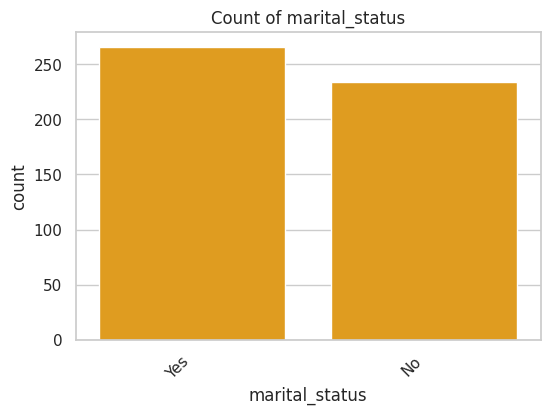

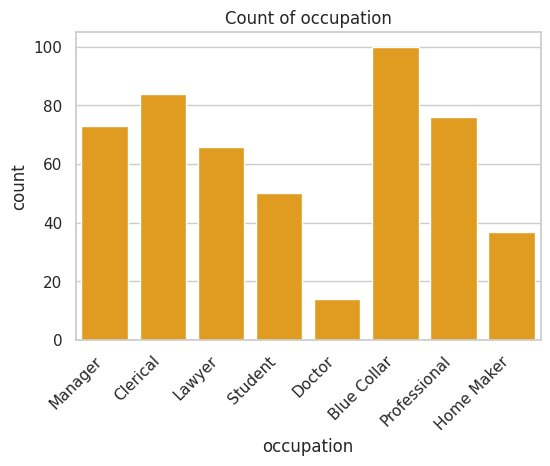

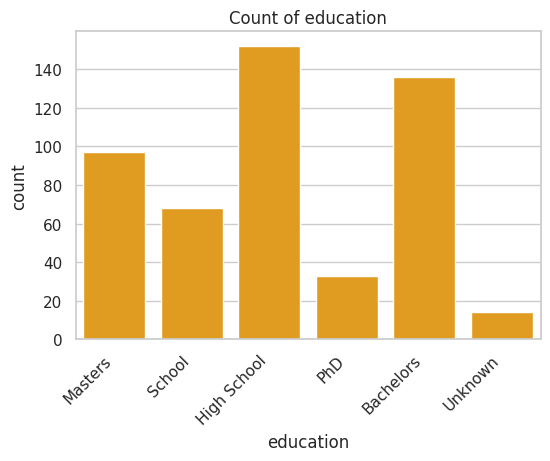

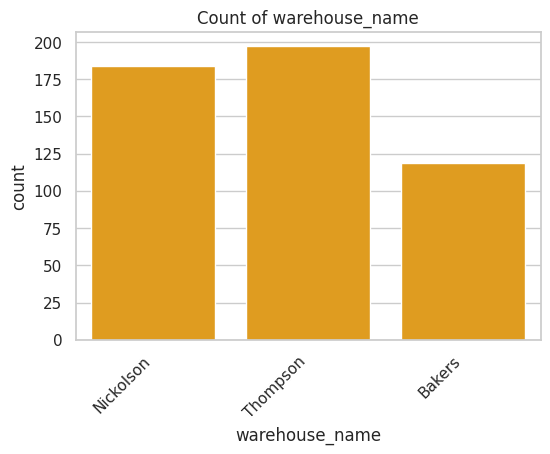

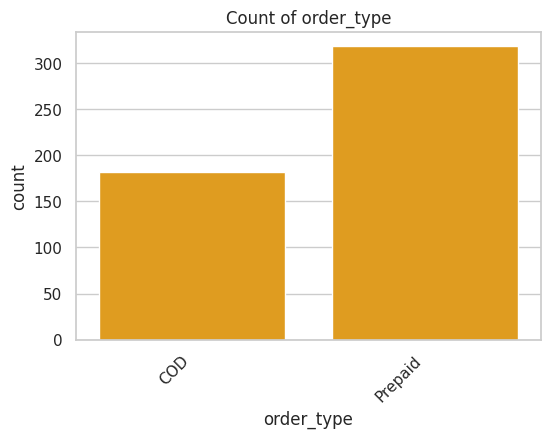

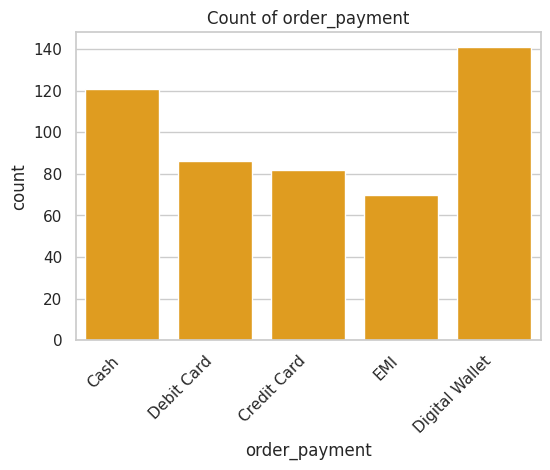

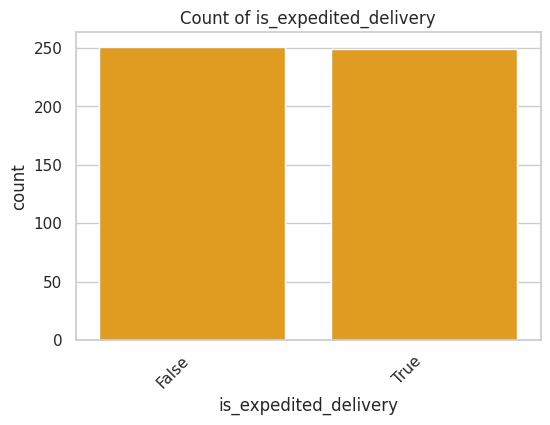

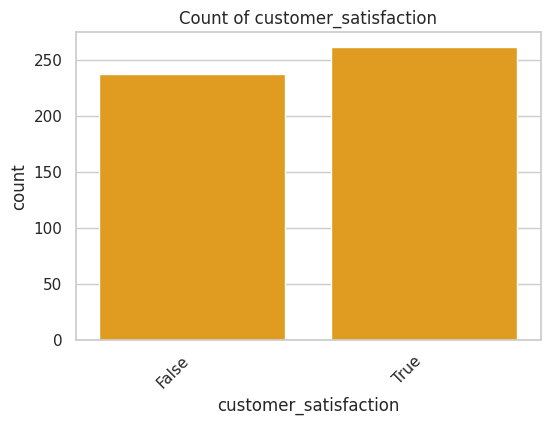

In [ ]:
# write you are code here
# Univariate Analysis
from IPython.display import Image, display

# Numeric columns - create histogram and save
numeric_cols = ['order_price','delivery_charges','coupon_discount','distance_to_nearest_warehouse','age','total_bill']
for col in numeric_cols:
    fig = plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    filename = f'/content/sample_data/{col}_dist.png'
    fig.savefig(filename, bbox_inches='tight')
    plt.close(fig)
    display(Image(filename=filename))

# Categorical columns - create count plots and save
categorical_cols = ['marital_status','occupation','education','warehouse_name','order_type','order_payment','is_expedited_delivery','customer_satisfaction']
for col in categorical_cols:
    fig = plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, color='orange')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')
    filename = f'/content/sample_data/{col}_count.png'
    fig.savefig(filename, bbox_inches='tight')
    plt.close(fig)
    display(Image(filename=filename))

### Bivariate Analysis


Do the bivariate analysis between column name - "customer_satisfaction" and different integer and categorical variables and write down the observations

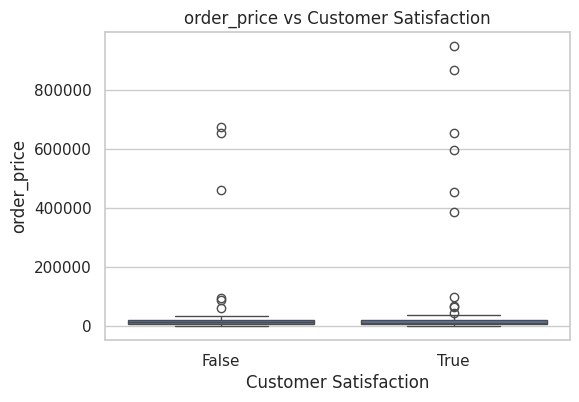

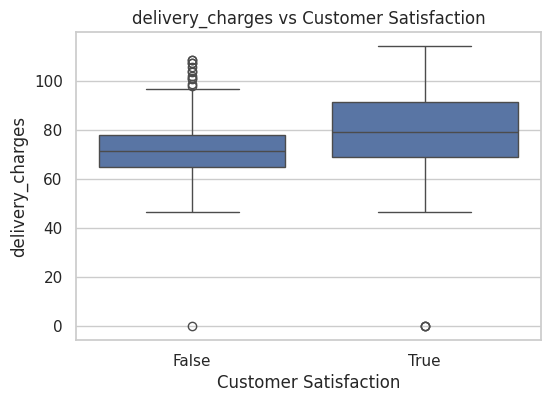

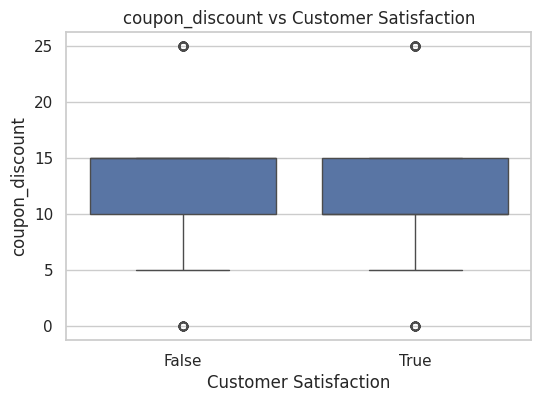

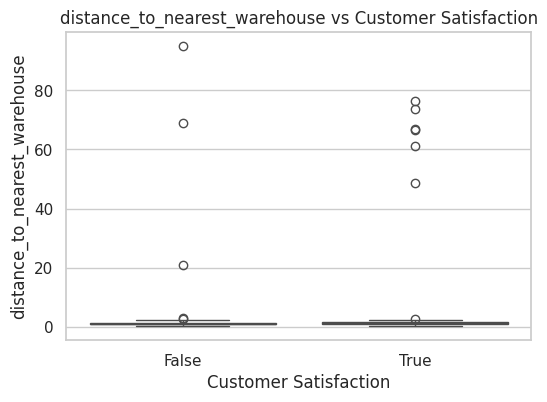

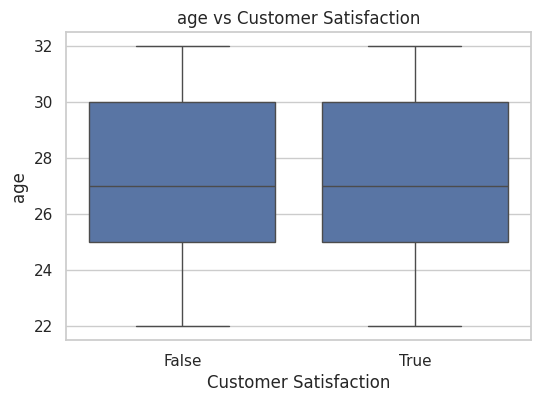

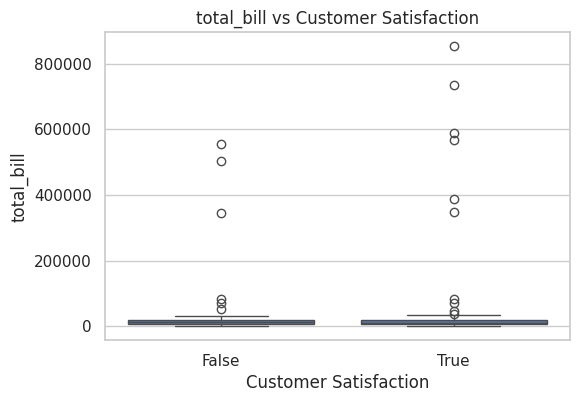

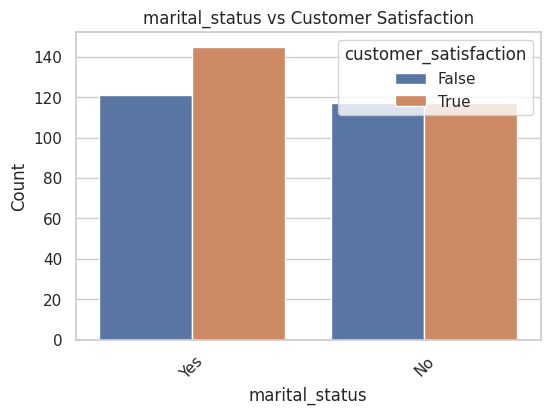

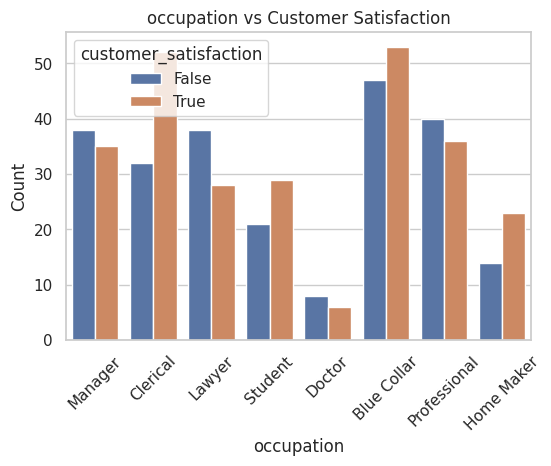

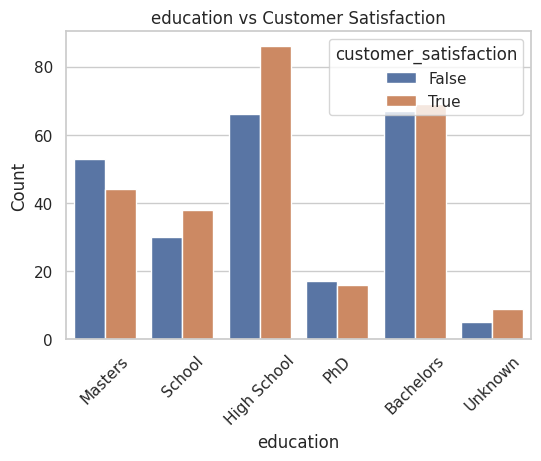

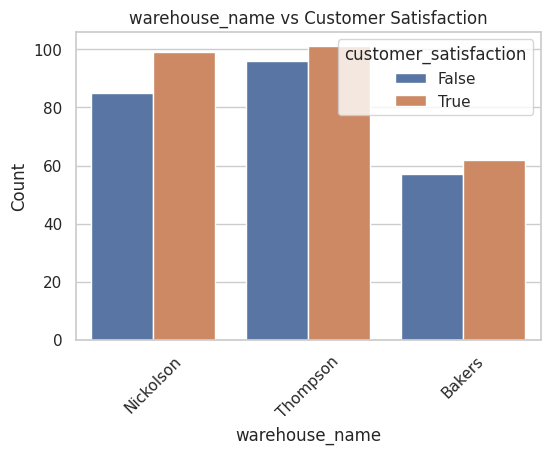

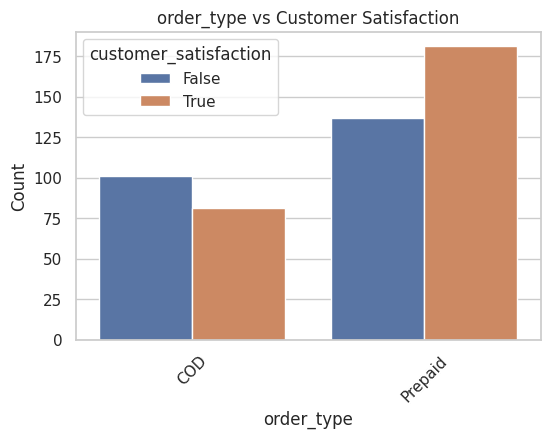

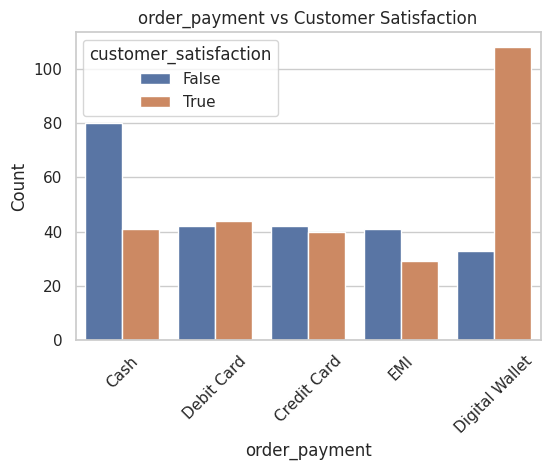

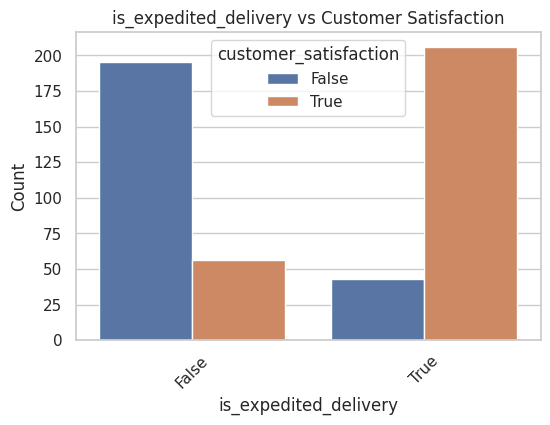

In [ ]:
# write you are code here
from IPython.display import Image, display

# Numeric and categorical columns for bivariate analysis
numeric_cols = ['order_price', 'delivery_charges', 'coupon_discount', 'distance_to_nearest_warehouse', 'age', 'total_bill']
categorical_cols = ['marital_status', 'occupation', 'education', 'warehouse_name', 'order_type', 'order_payment', 'is_expedited_delivery']

# Boxplots: numeric vs customer_satisfaction
for col in numeric_cols:
    fig = plt.figure(figsize=(6,4))
    sns.boxplot(x='customer_satisfaction', y=col, data=df)
    plt.title(f'{col} vs Customer Satisfaction')
    plt.xlabel('Customer Satisfaction')
    plt.ylabel(col)
    filename = f'/content/sample_data/bivariate_{col}.png'
    fig.savefig(filename, bbox_inches='tight')
    plt.close(fig)
    display(Image(filename=filename))

# Countplots: categorical vs customer_satisfaction
for col in categorical_cols:
    fig = plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='customer_satisfaction', data=df)
    plt.title(f'{col} vs Customer Satisfaction')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    filename = f'/content/sample_data/bivariate_{col}.png'
    fig.savefig(filename, bbox_inches='tight')
    plt.close(fig)
    display(Image(filename=filename))



## Outlier Treatment
Identify the columns in the dataset with the help of plots that was displayed above are required to treat outliers

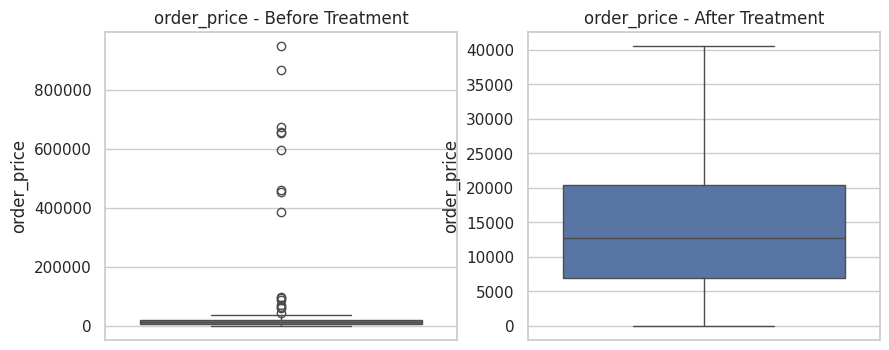

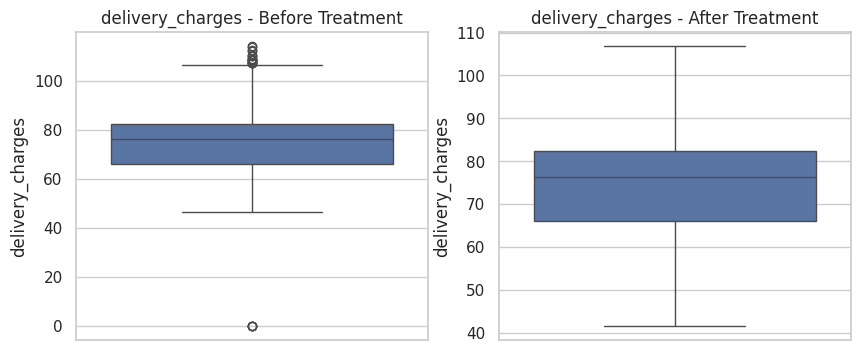

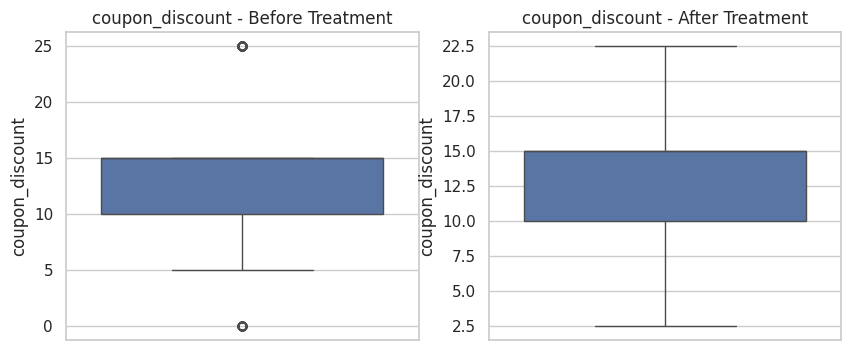

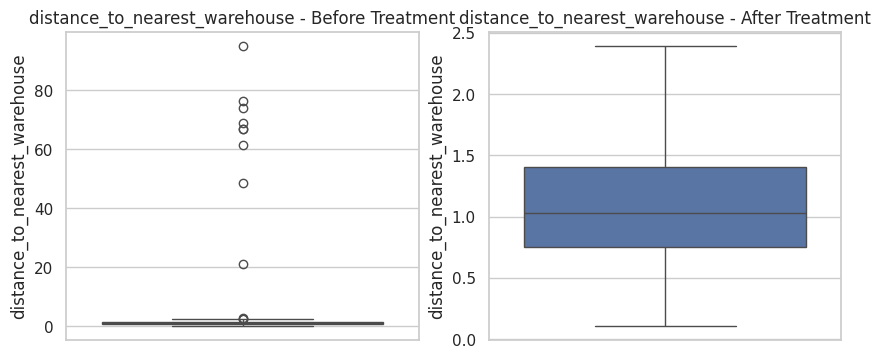

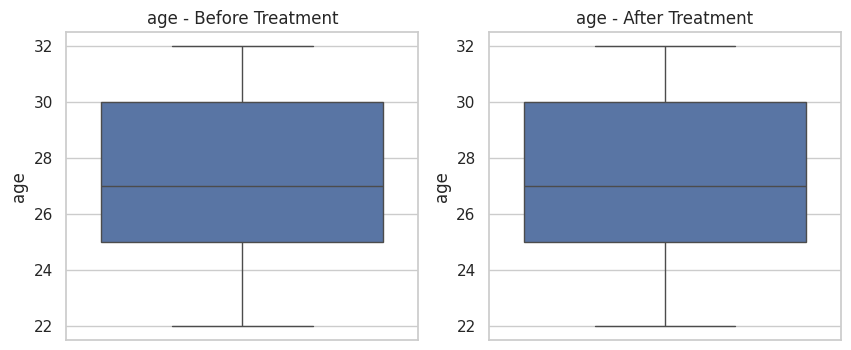

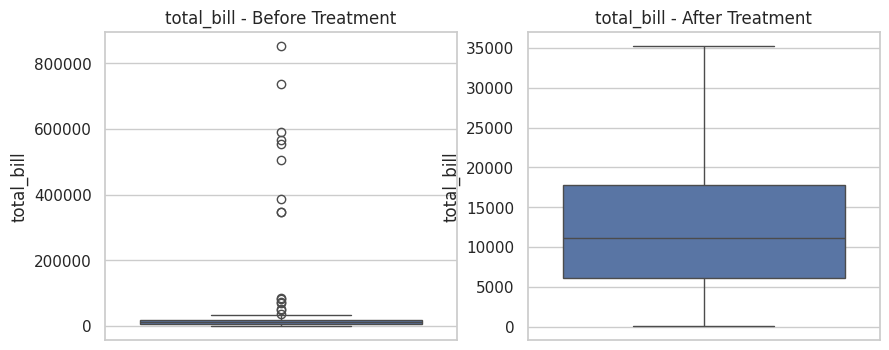

In [ ]:
# write you are code here
from IPython.display import Image, display
import numpy as np

# Outlier treatment using IQR method (winsorization)
numeric_cols = ['order_price', 'delivery_charges', 'coupon_discount', 'distance_to_nearest_warehouse', 'age', 'total_bill']

# Make a copy of original data for outlier treated data
df_outlier = df.copy()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Winsorize values
    df_outlier[col] = np.where(df_outlier[col] < lower_bound, lower_bound,
                               np.where(df_outlier[col] > upper_bound, upper_bound, df_outlier[col]))
    # Plot before and after boxplots side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.boxplot(y=df[col], ax=axes[0])
    axes[0].set_title(f'{col} - Before Treatment')
    sns.boxplot(y=df_outlier[col], ax=axes[1])
    axes[1].set_title(f'{col} - After Treatment')
    filename = f'/content/sample_data/outlier_{col}.png'
    fig.savefig(filename, bbox_inches='tight')
    plt.close(fig)
    display(Image(filename=filename))

# After treating outliers, replace original df numeric columns with treated values for further analysis
df[numeric_cols] = df_outlier[numeric_cols]
# write you are code here

## Answer the following business questions based upon the data

##### [Q1] What is the revenue across each warehouse?

  warehouse_name  total_bill
2       Thompson  2554945.91
1      Nickolson  2204937.47
0         Bakers  1496012.26


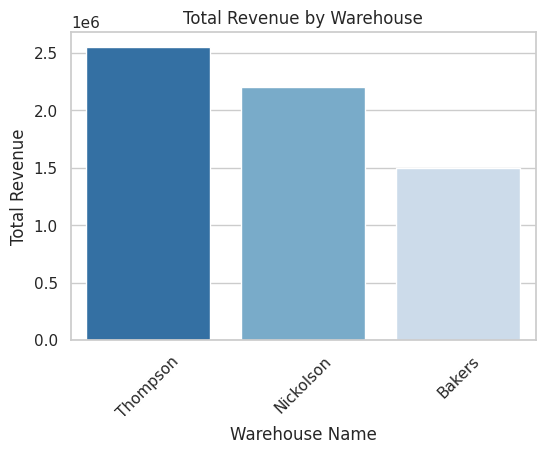

In [ ]:
# write you are code here
from IPython.display import Image, display

# Revenue generated across each warehouse
revenue_by_warehouse = df.groupby('warehouse_name')['total_bill'].sum().reset_index().sort_values(by='total_bill', ascending=False)
print(revenue_by_warehouse)

# Plotting revenue by warehouse
fig = plt.figure(figsize=(6,4))
sns.barplot(x='warehouse_name', y='total_bill', data=revenue_by_warehouse, palette='Blues_r')
plt.title('Total Revenue by Warehouse')
plt.xlabel('Warehouse Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
filename = '/content/sample_data/revenue_by_warehouse.png'
fig.savefig(filename, bbox_inches='tight')
plt.close(fig)
display(Image(filename=filename))
from IPython.display import Image, display


##### [Q2] What is the distribution of orders across different months?

Orders by month:
   order_month order_month_name  order_count
0            5              May          174
1            6             June          153
2            7             July          173


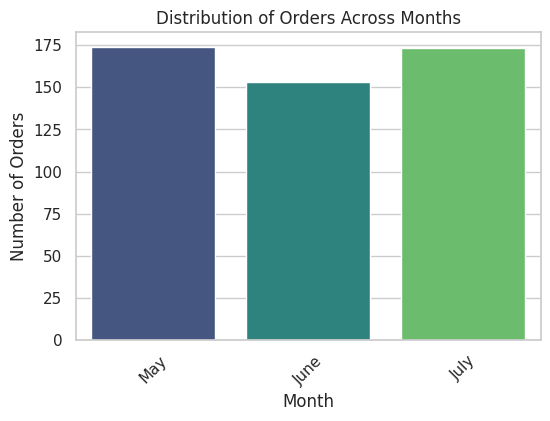

In [ ]:
# write you are code here

from IPython.display import Image, display

# ---------- Q2: Distribution of orders across different months ----------
# Convert to datetime if not already done
if df['order_date'].dtype == 'O':
    df['order_date'] = pd.to_datetime(df['order_date'])

# Create month number and name columns if not present
if 'order_month' not in df.columns:
    df['order_month'] = df['order_date'].dt.month
    df['order_month_name'] = df['order_date'].dt.month_name()

# Number of orders across months
orders_by_month = df.groupby(['order_month', 'order_month_name']).size().reset_index(name='order_count').sort_values('order_month')
print("Orders by month:")
print(orders_by_month)

fig = plt.figure(figsize=(6,4))
sns.barplot(x='order_month_name', y='order_count', data=orders_by_month, palette='viridis')
plt.title('Distribution of Orders Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
filename = '/content/sample_data/orders_by_month.png'
fig.savefig(filename, bbox_inches='tight')
plt.close(fig)
display(Image(filename=filename))










:##  [Q3] What is the revenue generated across various months?
rom IPython.display import Image, display

Convert order_date to datetime and extract month for analysis
if df['order_date'].dtype == 'O': df['order_date'] = pd.to_datetime(df['order_date'])

Create month number and month name columns for ordering
if 'order_month' not in df.columns: df['order_month'] = df['order_date'].dt.month df['order_month_name'] = df['order_date'].dt.month_name()

Compute number of orders across different months
orders_by_month = df.groupby(['order_month', 'order_month_name']).size().reset_index(name='order_count').sort_values('order_month') print(orders_by_month)

Plot distribution of orders across months
fig = plt.figure(figsize=(6,4)) sns.barplot(x='order_month_name', y='order_count', data=orders_by_month, palette='viridis') plt.title('Distribution of Orders Across Months') plt.xlabel('Month') plt.ylabel('Number of Orders') plt.xticks(rotation=45) filename = 'content/sample_data/orders_by_month.png' fig.savefig(filename, bbox_inches='tight') plt.close(fig) display(Image(filename=filename))


[ ]
11 cells hidden


Revenue by month:
   order_month order_month_name  total_bill
0            5              May  2171003.71
1            6             June  1877259.01
2            7             July  2207632.92


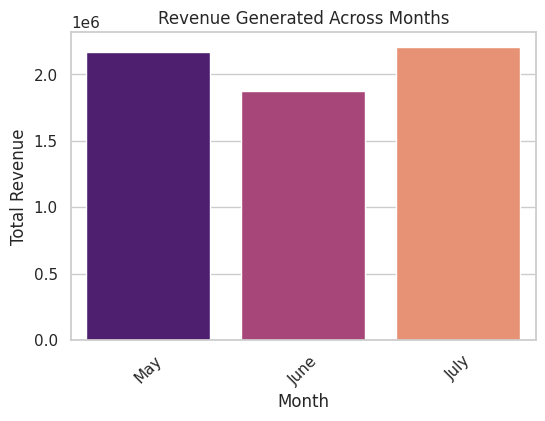

In [ ]:

# ---------- Q3: Revenue generated across various months ----------
revenue_by_month = df.groupby(['order_month', 'order_month_name'])['total_bill'].sum().reset_index().sort_values('order_month')
print("Revenue by month:")
print(revenue_by_month)

fig = plt.figure(figsize=(6,4))
sns.barplot(x='order_month_name', y='total_bill', data=revenue_by_month, palette='magma')
plt.title('Revenue Generated Across Months')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
filename = '/content/sample_data/revenue_by_month.png'
fig.savefig(filename, bbox_inches='tight')
plt.close(fig)
display(Image(filename=filename))






##### [Q4] What is the customer satisfaction distribution across different coupon discounts?

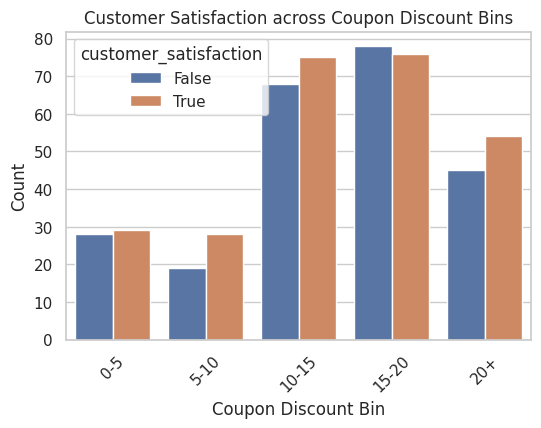

In [ ]:
# write you are code here

# ---------- Q4: Customer satisfaction distribution across different coupon discounts ----------
# Bin the coupon discounts into categories
bins = [-float('inf'), 5, 10, 15, 20, float('inf')]
labels = ['0-5', '5-10', '10-15', '15-20', '20+']
df['discount_bin'] = pd.cut(df['coupon_discount'], bins=bins, labels=labels, right=False)

# Plot distribution of customer satisfaction across discount bins
fig = plt.figure(figsize=(6,4))
sns.countplot(x='discount_bin', hue='customer_satisfaction', data=df)
plt.title('Customer Satisfaction across Coupon Discount Bins')
plt.xlabel('Coupon Discount Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)
filename = '/content/sample_data/satisfaction_by_discount_bin.png'
fig.savefig(filename, bbox_inches='tight')
plt.close(fig)
display(Image(filename=filename))






## Power Ahead!